In [42]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# creating dataframe
df = pd.read_csv('./resources/Books.csv')
df.head()

,Unnamed: 0,Title,Author,Rating Count,Review Count,Rating Value,N pag,1st Pub,series,Genres,Awards,minmax_norm_ratings,mean_norm_ratings,Link
0,0,To Kill a Mockingbird,Harper Lee,4629082,92962,4.28,324.0,1960.0,1,"['Classics', 'Fiction', 'Historical']",4.0,7.705,7.448889,https://www.goodreads.com/book/show/2657.To_Ki...
1,1,1984,George Orwell,3250211,72375,4.19,237.0,1949.0,0,"['Classics', 'Fiction', 'Science Fiction']",2.0,7.161,6.845556,https://www.goodreads.com/book/show/40961427-1984
2,2,The Great Gatsby,F. Scott Fitzgerald,3877685,68965,3.93,200.0,1925.0,0,"['Classics', 'Fiction', 'Academic']",1.0,5.591,5.100000,https://www.goodreads.com/book/show/3.Harry_Po...
3,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,7281482,115354,4.48,309.0,1997.0,1,"['Fantasy', 'Fiction', 'Young Adult']",28.0,8.913,8.791111,https://www.goodreads.com/book/show/4671.The_G...
4,4,"The Hobbit, or There and Back Again",J.R.R. Tolkien,2973224,49547,4.28,366.0,1937.0,1,"['Fantasy', 'Classics', 'Fiction']",3.0,7.705,7.448889,https://www.goodreads.com/book/show/170448.Ani...


In [44]:
# samplinig 100 random rows from the dataframe
df_sampled = df.sample(n=100)
print(len(df_sampled.index))
df_sampled.head()

100


,Unnamed: 0,Title,Author,Rating Count,Review Count,Rating Value,N pag,1st Pub,series,Genres,Awards,minmax_norm_ratings,mean_norm_ratings,Link
148,148,The House of the Spirits,Isabel Allende,195037,8828,4.24,448.0,1982.0,1,"['Fiction', 'Magical Realism', 'Historical']",2.0,7.463,7.181111,https://www.goodreads.com/book/show/9328.The_H...
405,405,Finnegans Wake,James Joyce,11630,953,3.67,628.0,1939.0,0,"['Fiction', 'Classics', 'Literature']",NaN,4.020,3.355556,https://www.goodreads.com/book/show/6174.Survi...
279,279,Go Ask Alice,Beatrice Sparks,238875,10796,3.76,213.0,1971.0,0,"['Young Adult', 'Fiction', 'Classics']",NaN,4.564,3.958889,https://www.goodreads.com/book/show/4953.A_Hea...
118,118,Things Fall Apart,Chinua Achebe,295866,14361,3.69,209.0,1958.0,1,"['Fiction', 'Classics', 'Historical']",NaN,4.141,3.490000,https://www.goodreads.com/book/show/43763.Inte...
527,527,Message in a Bottle,Nicholas Sparks,216473,4359,3.96,342.0,1988.0,0,"['Romance', 'Fiction', 'Womens Fiction']",NaN,5.772,5.302222,https://www.goodreads.com/book/show/545951.Dea...


In [74]:
# creating a correlation table for every column in the dataframe

correlation_table = df.corr()
correlation_table

,Unnamed: 0,Rating Count,Review Count,Rating Value,N pag,1st Pub,series,Awards,minmax_norm_ratings,mean_norm_ratings
Unnamed: 0,1.000000,-0.426269,-0.496360,-0.056289,0.063050,0.103035,0.048269,-0.098949,-0.056301,-0.056277
Rating Count,-0.426269,1.000000,0.898350,0.125564,-0.043934,0.077829,0.100626,0.331881,0.125584,0.125552
Review Count,-0.496360,0.898350,1.000000,0.096108,-0.055504,0.114878,0.083041,0.361811,0.096126,0.096094
Rating Value,-0.056289,0.125564,0.096108,1.000000,0.169297,0.084878,0.173873,0.037404,1.000000,1.000000
N pag,0.063050,-0.043934,-0.055504,0.169297,1.000000,0.079704,0.104358,-0.018244,0.169306,0.169290
1st Pub,0.103035,0.077829,0.114878,0.084878,0.079704,1.000000,0.102828,0.373217,0.084876,0.084877
series,0.048269,0.100626,0.083041,0.173873,0.104358,0.102828,1.000000,0.128684,0.173871,0.173872
Awards,-0.098949,0.331881,0.361811,0.037404,-0.018244,0.373217,0.128684,1.000000,0.037400,0.037394
minmax_norm_ratings,-0.056301,0.125584,0.096126,1.000000,0.169306,0.084876,0.173871,0.037400,1.000000,1.000000
mean_norm_ratings,-0.056277,0.125552,0.096094,1.000000,0.169290,0.084877,0.173872,0.037394,1.000000,1.000000


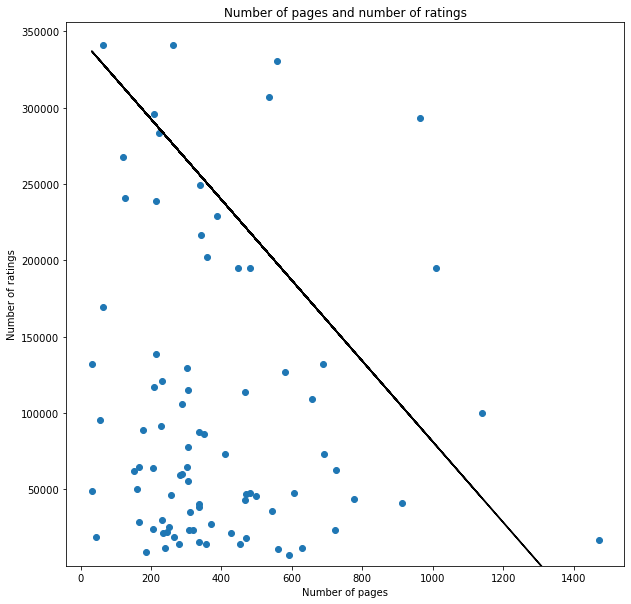

In [45]:
# creating scatter plot of pages and number of ratings
plt.figure(figsize=(10,10))
slope, intercept = np.polyfit(df_sampled['N pag'], df_sampled['Rating Count'], 1)
plt.plot(df_sampled['N pag'], slope * df_sampled['N pag'] + intercept, color='black') # code for the regression line
plt.ylim(2)
plt.scatter(df_sampled['N pag'], df_sampled['Rating Count'])
plt.xlabel('Number of pages')
plt.ylabel('Number of ratings')
plt.title('Number of pages and number of ratings')
# exporting plot
# plt.savefig('./resources/pages_ratings.jpg')

In [46]:
# calculating correlation coefficient for number of pages and number of ratings

cc_npages_nrating = df['N pag'].corr(df['Rating Count'])
print(f'Correlation coefficient for number of pages and number of rating is: {cc_npages_nrating}')

Correlation coefficient for number of pages and number of rating is: -0.04393430173839197


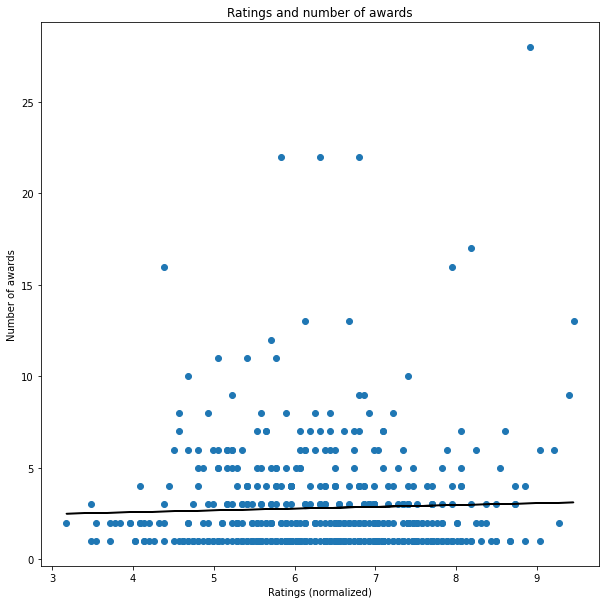

In [47]:
# plotting normalized ratings and number of awards in scatterplot

df_dropped = df[['minmax_norm_ratings', 'Awards']]
df_droppped = df_dropped.dropna(inplace=True)
plt.figure(figsize=(10,10))
slope, intercept = np.polyfit(df_dropped['minmax_norm_ratings'], df_dropped['Awards'], 1)
plt.plot(df_dropped['minmax_norm_ratings'], slope*df_dropped['minmax_norm_ratings'] + intercept, color='black')
plt.scatter(df_dropped['minmax_norm_ratings'], df_dropped['Awards'])
plt.xlabel('Ratings (normalized)')
plt.ylabel('Number of awards')
plt.title('Ratings and number of awards')
# plt.savefig('./resources/ratings_awards.jpg')

In [48]:
# calculating correlation coefficient for ratings and number of awards

cc_ratings_awards = df['minmax_norm_ratings'].corr(df['Awards'])

print(f'Correlation coefficient for ratings and number of awards is: {cc_ratings_awards}')

Correlation coefficient for ratings and number of awards is: 0.037399908456445356


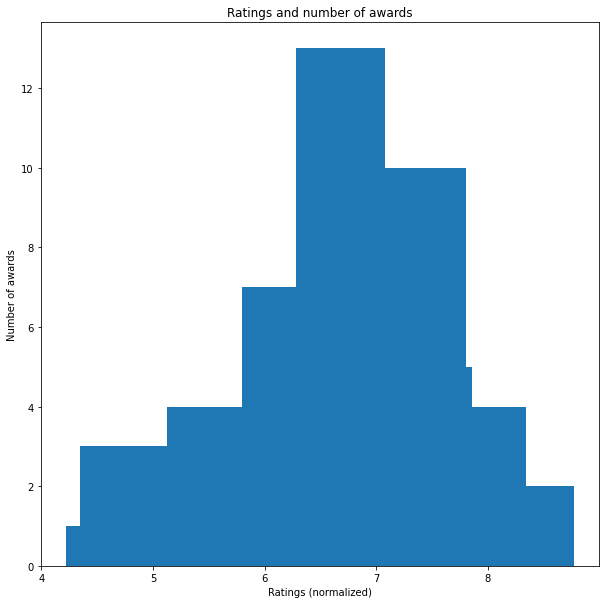

In [51]:
# plotting normalized ratings and number of awards in bar chart

plt.figure(figsize=(10, 10))
plt.bar(df_sampled['minmax_norm_ratings'], df_sampled['Awards'])
plt.xlabel('Ratings (normalized)')
plt.ylabel('Number of awards')
plt.title('Ratings and number of awards')
# plt.savefig('./resources/ratings_awards_bar.jpg')

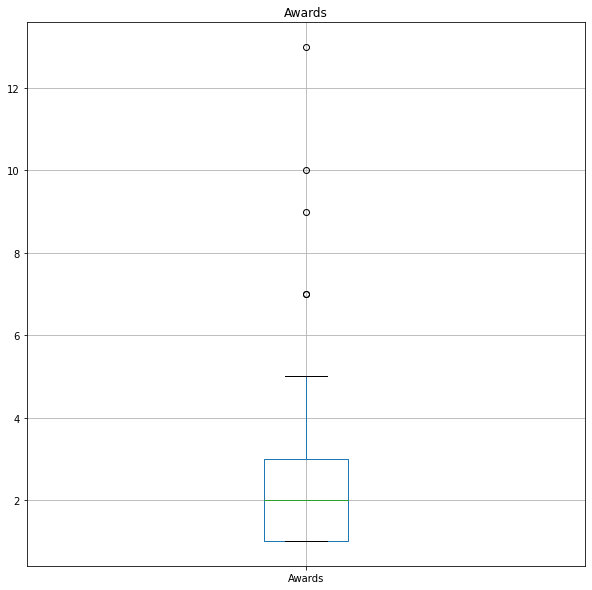

In [62]:
# plotting awards in a boxplot

df_sampled.boxplot(column=['Awards'], figsize=(10,10))
plt.title('Awards')
# plt.savefig('./resources/awards_boxplot.jpg')